# Visualize a robot controller

Visualize the architecture of a robot controller, by listing it and generating a graph.

In [8]:
import sys
sys.path.append("..")

from exp_run_config import Config
Config.PROJECTNAME = "BerryPicker"
import pathlib
import pprint
import torch
torch.manual_seed(1)
from abstract_robot_controller import AbstractRobotController

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "cpu"
print(f"Using device: {device}")

Using device: cpu


### Exp/run initialization
Create the exp/run-s that describe the parameters of the training. Some of the code here is structured in such a way as to make the notebook automatizable with papermill.

In [9]:
# *** Initialize the variables with default values 
# *** This cell should be tagged as parameters     
# *** If papermill is used, some of the values will be overwritten 

# If it is set to true, the exprun will be recreated from scratch
creation_style = "exist-ok"

# If not None, set an external experiment path
external_path = None
# If not None, set an output path
data_path = None

experiment = "robot_controller"
run = "roco_sample"
# run = "bc_lstm_00"
# run = "bc_lstm_resid_00"
# run = "bc_lstm_mdn_00"
# exp = Config().get_experiment(experiment, run)

# **** The settings below are used to debug a particular run in flow 
# **** They do not affect the run of the flow, 
# **** because they are going to be overwritten by papermill
#data_path = "c:/Users/lotzi/Work/_Data/BerryPicker-Flows/BerryPicker-BC/result"
#experiment = "behavior_cloning"
#external_path = "c:/Users/lotzi/Work/_Data/BerryPicker-Flows/BerryPicker-BC/exprun"
#run = "bc_mlp_0001"


In [10]:
if external_path:
    external_path = pathlib.Path(external_path)
    assert external_path.exists()
    Config().set_exprun_path(external_path)
    #Config().copy_experiment("sensorprocessing_conv_vae")
    #Config().copy_experiment("robot_al5d")
    #Config().copy_experiment("demonstration")
    #Config().copy_experiment("behavior_cloning")
    Config().copy_experiment("robot_control")
if data_path:
    data_path = pathlib.Path(data_path)
    assert data_path.exists()
    Config().set_results_path(data_path)

exp = Config().get_experiment(experiment, run, creation_style=creation_style)
pprint.pprint(exp)

***ExpRun**: Experiment default config /Users/lboloni/Documents/Develop/Github/BerryPicker/BerryPicker/src/experiment_configs/robot_controller/_defaults_robot_controller.yaml was empty, ok.
***ExpRun**: Configuration for exp/run: robot_controller/roco_sample successfully loaded
Experiment:
    components:
      proprioception_input:
        run: rcco_input_default
        type: RCCO_Input
      robot_output:
        run: rcco_output_default
        type: RCCO_Output
      sensor_processing:
        run: rcco_vae_default
        type: RCCO_VAE
      visual_input:
        run: rcco_input_default
        type: RCCO_Input
    connections:
    - from_component: visual_input
      from_output: input
      to_component: sensor_processing
      to_input: input
    data_dir: /Users/lboloni/Documents/Develop/Data/BerryPicker/robot_controller/roco_sample
    exp_run_sys_indep_file: /Users/lboloni/Documents/Develop/Github/BerryPicker/BerryPicker/src/experiment_configs/robot_controller/roco_sample.

In [11]:
con = exp["connections"]
print(con)

[{'from_component': 'visual_input', 'from_output': 'input', 'to_component': 'sensor_processing', 'to_input': 'input'}]


In [12]:
roco = AbstractRobotController(exp)

***ExpRun**: Experiment default config /Users/lboloni/Documents/Develop/Github/BerryPicker/BerryPicker/src/experiment_configs/robot_controller/_defaults_robot_controller.yaml was empty, ok.
***ExpRun**: Configuration for exp/run: robot_controller/rcco_input_default successfully loaded
***ExpRun**: Experiment default config /Users/lboloni/Documents/Develop/Github/BerryPicker/BerryPicker/src/experiment_configs/robot_controller/_defaults_robot_controller.yaml was empty, ok.
***ExpRun**: Configuration for exp/run: robot_controller/rcco_input_default successfully loaded
***ExpRun**: Experiment default config /Users/lboloni/Documents/Develop/Github/BerryPicker/BerryPicker/src/experiment_configs/robot_controller/_defaults_robot_controller.yaml was empty, ok.
***ExpRun**: Configuration for exp/run: robot_controller/rcco_output_default successfully loaded
***ExpRun**: Experiment default config /Users/lboloni/Documents/Develop/Github/BerryPicker/BerryPicker/src/experiment_configs/robot_controlle

In [13]:
from graphviz import Digraph

def visualize_robot(roco, filename="robot_graph"):
    """
    Visualizes the robot components and their port-to-port connections.
    """
    dot = Digraph(comment='Robot Component Map')
    dot.attr(rankdir='LR')  # Left-to-right flow
    dot.attr(nodesep='0.5', ranksep='1.0')

    # 1. Create nodes from the components dictionary
    for label in roco.components.keys():
        dot.node(label, label, shape="box", style="rounded,filled", fillcolor="lightgray")

    # 2. Create edges using your specific YAML keys
    for conn in roco.connections:
        src = conn.get("from_component")
        dst = conn.get("to_component")
        
        # Create a label for the edge showing the ports
        # e.g., "input -> input"
        edge_label = f"{conn.get('from_output')} → {conn.get('to_input')}"
        
        if src and dst:
            dot.edge(src, dst, label=edge_label, fontsize="10")

    # Render the graph
    try:
        dot.render(filename, format="png", cleanup=True)
        print(f"Graph generated: {filename}.png")
    except Exception as e:
        print(f"Could not render: {e}")

    return dot

Graph generated: robot_graph.png


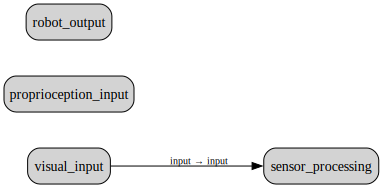

In [14]:
visualize_robot(roco)